In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
from scipy import stats
import json
import random
import sys
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import math

## Load Data
inspired by Timos work :)

In [2]:
def read_json_objects_from_file(file_path):
    with open(file_path, 'r') as file:
        file_content = file.read()
        # Split the content based on semicolons
        json_objects = file_content.split(';')
        # Remove any leading or trailing whitespaces from each JSON object
        json_objects = [json_object.strip() for json_object in json_objects]
        # Init output list
        data_list = []
        # Parse each JSON object
        for index, json_object in enumerate(json_objects):
            try:
                # Load JSON object
                data = json.loads(json_object)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON object {index}: {e}")
                
        return data_list



In [3]:
path_tue = 'Data/satellite_above_tübingen_90.txt'
path_rome = 'Data/satellite_above_rome_90.txt'

# ROME
data_list_rome = read_json_objects_from_file(path_rome)
n_samples_rome = len(data_list_rome)

#n = 100
n_samples = len(data_list_rome)
sample_idx = np.arange(n_samples)
random_indices = np.random.choice(sample_idx, size=n_samples)

lats_rome = []
longs_rome = []
dfs_rome = []

for idx in random_indices:
    data_rome = data_list_rome[idx]
    df_rome = pd.DataFrame(data_rome['above'])
    lats_rome.append(df_rome['satlat'])
    longs_rome.append(df_rome['satlng'])
    dfs_rome.append(df_rome)

data_rome = pd.concat(dfs_rome, axis=0)
data_rome.info()

# TUEBINGEN
data_list_tue = read_json_objects_from_file(path_tue)
n_samples_tue = len(data_list_tue)

lats_tue = []
longs_tue = []
alts_tue = []
dfs_tue = []

for idx in random_indices:
    data_tue = data_list_tue[idx]
    df_tue = pd.DataFrame(data_tue['above'])
    lats_tue.append(df_tue['satlat'])
    longs_tue.append(df_tue['satlng'])
    alts_tue.append(df_tue['satalt'])
    dfs_tue.append(df_tue)
    
data_tue = pd.concat(dfs_tue, axis=0)
data_tue.info()

Error decoding JSON object 47: Expecting value: line 1 column 1 (char 0)
<class 'pandas.core.frame.DataFrame'>
Index: 138979 entries, 0 to 2913
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   satid          138979 non-null  int64  
 1   satname        138979 non-null  object 
 2   intDesignator  138979 non-null  object 
 3   launchDate     138979 non-null  object 
 4   satlat         138979 non-null  float64
 5   satlng         138979 non-null  float64
 6   satalt         138979 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.5+ MB
Error decoding JSON object 48: Expecting value: line 1 column 1 (char 0)
<class 'pandas.core.frame.DataFrame'>
Index: 144927 entries, 0 to 3065
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   satid          144927 non-null  int64  
 1   satname        144927 non-null  object 
 

## PLOTS

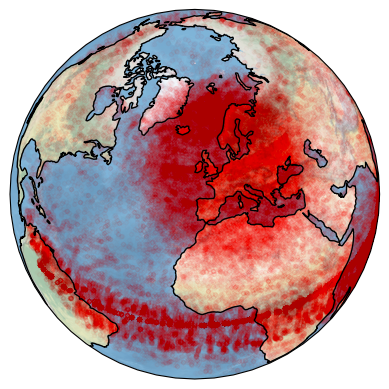

In [4]:
# TÜBINGEN
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
#ax.set_extent([-50, 50, 20, 90], crs=ccrs.PlateCarree())
for lat, long in zip(lats_tue, longs_tue):
    ax.scatter(long, lat, alpha=.01, color='r', marker='.', transform=data_crs)


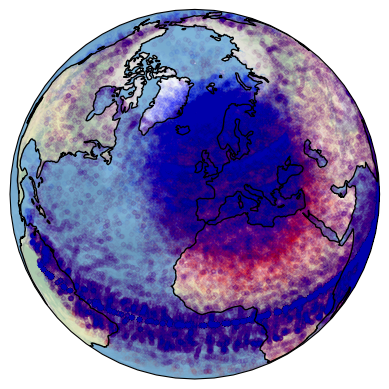

In [5]:
# ROME
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
#ax.set_extent([-50, 50, 20, 90], crs=ccrs.PlateCarree())
for lat, long in zip(lats_rome, longs_rome):
    ax.scatter(long, lat, alpha=.01, color='r', marker='.', transform=data_crs)

# TÜBINGEN
for lat, long in zip(lats_tue, longs_tue):
    plt.scatter(long, lat, alpha=.01, color='b', marker='.', transform=data_crs)


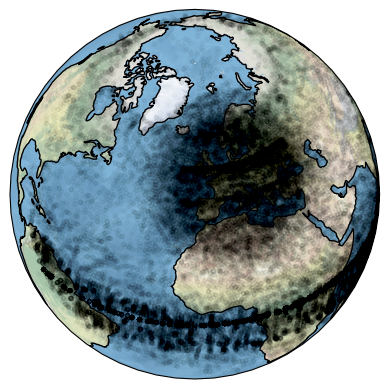

In [6]:
# COMMON
dfs_common = []
lats_common = []
longs_common = []

for idx in random_indices:
    data_t = data_list_tue[idx]
    df_t = pd.DataFrame(data_t['above'])
    data_r = data_list_rome[idx]
    df_r = pd.DataFrame(data_r['above'])
    df_common = df_r.loc[df_r['satid'].isin(df_t['satid'])]
    lats_common.append(df_common['satlat'])
    longs_common.append(df_common['satlng'])
    dfs_common.append(df_common)

data_common = pd.concat(dfs_common, axis=0)

ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
#ax.set_extent([-50, 50, 20, 90], crs=ccrs.PlateCarree())
for lat, long in zip(lats_common, longs_common):
    ax.scatter(long, lat, alpha=.01, color='k', marker='.', transform = data_crs)

plt.show()

Here's to why our data looks so oddly distributed:

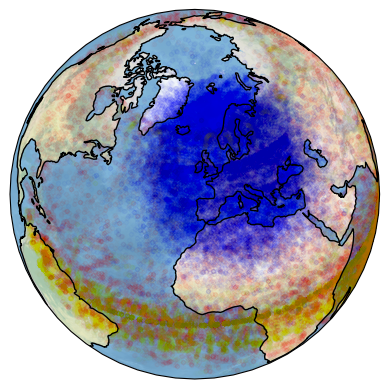

In [7]:
# satellites with altitude > 10000
data_tue_high = data_tue[(data_tue['satalt'] > 10000) & (data_tue['satalt'] < 35000)]
# satellites with altitude < 10000
data_tue_low = data_tue[data_tue['satalt'] < 10000]
# satellites with altitude > 20000
data_tue_higher = data_tue[data_tue['satalt'] > 35000]

data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
ax.scatter(np.array(data_tue_high['satlng']), np.array(data_tue_high['satlat']), alpha=.01, color='r', marker='.', transform=data_crs)
ax.scatter(np.array(data_tue_low['satlng']), np.array(data_tue_low['satlat']), alpha=.01, color='b', marker='.', transform=data_crs)
ax.scatter(np.array(data_tue_higher['satlng']), np.array(data_tue_higher['satlat']), alpha=.01, color='y', marker='.', transform=data_crs)

Plot different orbits: https://de.wikipedia.org/wiki/Satellitenorbit

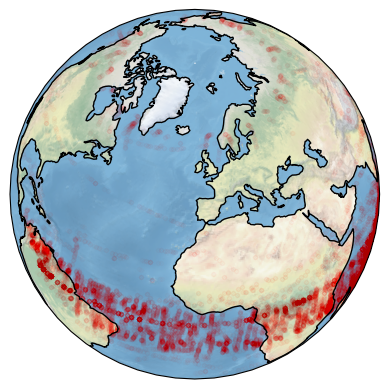

In [8]:
# LEO orbit: below 2000 km
data_tue_LEO = data_tue[data_tue['satalt'] < 2000]
# MEO orbit: 2000 - 35786 km
data_tue_MEO = data_tue[(data_tue['satalt'] >= 2000) & (data_tue['satalt'] < 35786)]
# HEO orbit: above 35786 km
data_tue_GEO = data_tue[data_tue['satalt'] >= 35786]

data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
#ax.scatter(np.array(data_tue_LEO['satlng']), np.array(data_tue_LEO['satlat']), alpha=.01, color='y', marker='.', transform=data_crs)
#ax.scatter(np.array(data_tue_MEO['satlng']), np.array(data_tue_MEO['satlat']), alpha=.01, color='b', marker='.', transform=data_crs)
ax.scatter(np.array(data_tue_GEO['satlng']), np.array(data_tue_GEO['satlat']), alpha=.01, color='r', marker='.', transform=data_crs)

## Extract surface where we captured all the satellites

Distance in spherical coordinates:
 ${\mathbf D} = \sqrt{r^2+r'^2-2rr'(\sin{\theta}\sin{\theta'}\cos{(\varphi-\varphi')} + \cos{\theta}\cos{\theta'})}$

 Since the latitude is 0 at the equator, we need to subtract the latitude values from 90°.
 
 We also need to transform degrees to radians for the trigonometric functions of the math library!


In [13]:
import math

def filter_data_tue(data_tue):
    # Filter by euclidean distance to Tübingen
    r = 6371 # earth radius (cancels out in the formula)
    gamma = 14.172
    gamma_in_meters = gamma * 2 * r * math.pi / 360
    tue_lat = 90 - 48.782536
    tue_long = 9.176995
    rome_lat = 41.52
    rome_long = 12.29
    
    data_tue_masked = data_tue[np.sqrt((2*r**2 - 2*r**2 *
                  ((math.sin(np.radians(tue_lat)) * data_tue['satlat'].apply(lambda x: math.sin(np.radians(90 - x))) 
                    * data_tue['satlng'].apply(lambda x: math.cos(np.radians(tue_long-x)))) 
                    + (math.cos(np.radians(tue_lat)) * data_tue['satlat'].apply(lambda x: math.cos(np.radians(90 - x))))))) <= gamma_in_meters]
    
    return data_tue_masked

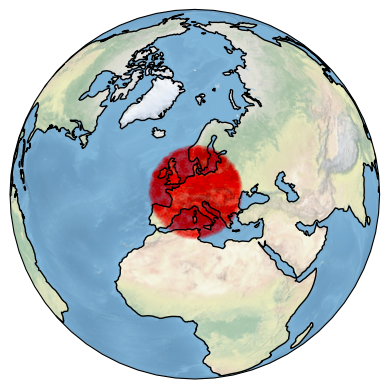

In [14]:
# Usage example:
data_tue_masked = filter_data_tue(data_tue)

# Plot
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(9, 48))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
ax.scatter(np.array(data_tue_masked['satlng']), np.array(data_tue_masked['satlat']), alpha=.01, color='r', marker='.', transform=data_crs)

### Filter Satellites by categories (Starlink and more)

In [24]:
data_tue['is_starlink'] = data_tue['satname'].apply(lambda x: 1 if 'SL-' in x else 0)
data_tue['is_cosmos'] = data_tue['satname'].apply(lambda x: 1 if 'COSMOS' in x else 0)
data_tue['is_usa'] = data_tue['satname'].apply(lambda x: 1 if 'USA' in x else 0)
# data_tue.info()
print(data_tue['is_starlink'].value_counts())
print(data_tue['is_cosmos'].value_counts())
print(data_tue['is_usa'].value_counts())

data_tue_starlink = data_tue[data_tue['is_starlink'] == 1]
data_tue_cosmos = data_tue[data_tue['is_cosmos'] == 1]
data_tue_usa = data_tue[data_tue['is_usa'] == 1]

is_starlink
0    131502
1     13425
Name: count, dtype: int64
is_cosmos
0    128317
1     16610
Name: count, dtype: int64
is_usa
0    140435
1      4492
Name: count, dtype: int64


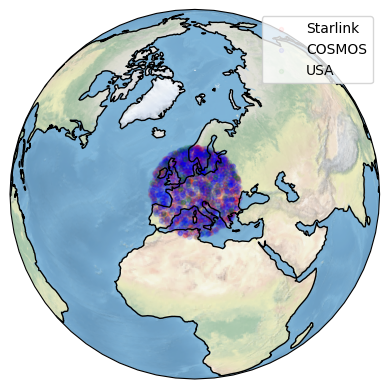

In [27]:
# Usage example:
data_tue_starlink_masked = filter_data_tue(data_tue_starlink)
data_tue_cosmos_masked = filter_data_tue(data_tue_cosmos)
data_tue_usa_masked = filter_data_tue(data_tue_usa)

# Plot
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(9, 48))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
scatter_starlink = ax.scatter(np.array(data_tue_starlink_masked['satlng']), np.array(data_tue_starlink_masked['satlat']), alpha=.05, color='r', marker='.', transform=data_crs)
scatter_cosmos = ax.scatter(np.array(data_tue_cosmos_masked['satlng']), np.array(data_tue_cosmos_masked['satlat']), alpha=.05, color='b', marker='.', transform=data_crs)
scatter_usa = ax.scatter(np.array(data_tue_usa_masked['satlng']), np.array(data_tue_usa_masked['satlat']), alpha=.05, color='g', marker='.', transform=data_crs)

ax.legend([scatter_starlink, scatter_cosmos, scatter_usa], ['Starlink', 'COSMOS', 'USA'])


## First try for a kernel density estimate
creates a dramatic looking plot, inspired by https://ipython-books.github.io/76-estimating-a-probability-distribution-nonparametrically-with-a-kernel-density-estimation/

Error decoding JSON object 48: Expecting value: line 1 column 1 (char 0)
48


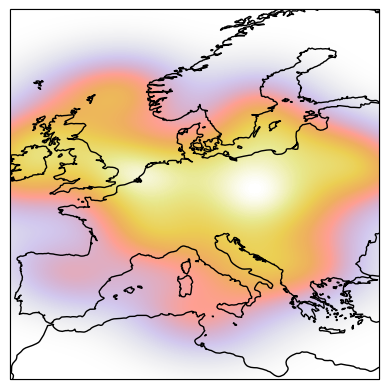

In [30]:
path = 'Data/satellite_above_tübingen_90.txt'

data_list = read_json_objects_from_file(path)
n_samples = len(data_list)
print(n_samples)

n = 20
# np.random.seed(0)
sample_idx = np.arange(n_samples)
random_indices = np.random.choice(sample_idx, size=n)

dfs = []

for idx in random_indices:
    data = data_list[idx]
    df = pd.DataFrame(data['above'])
    dfs.append(df)
        
data = pd.concat(dfs, axis=0)
## Code above not used here

# lats = np.array(np.array(data_tue_masked['satlng'])) 
# longs = np.array(np.array(data_tue_masked['satlat']))

# lats = np.array(np.array(data_tue_starlink_masked['satlng']))
# longs = np.array(np.array(data_tue_starlink_masked['satlat']))

# lats = np.array(np.array(data_tue_cosmos_masked['satlng']))
# longs = np.array(np.array(data_tue_cosmos_masked['satlat']))

lats = np.array(np.array(data_tue_usa_masked['satlng']))
longs = np.array(np.array(data_tue_usa_masked['satlat']))


geo = ccrs.Geodetic()
crs = ccrs.PlateCarree()

ax = plt.axes(projection=crs)
ax.coastlines()
ax.set_extent([-10, 30, 30, 69])

h = crs.transform_points(geo, lats, longs)[:, :2].T

kde = stats.gaussian_kde(h)

k = 100
# Coordinates of the four corners of the map.
x0, x1, y0, y1 = ax.get_extent()
# Create the grid.
tx, ty = np.meshgrid(np.linspace(x0, x1, 2 * k),
                    np.linspace(y0, y1, k))
# Reshape the grid for the kde() function.
mesh = np.vstack((tx.ravel(), ty.ravel()))
# Evaluate the kde() function on the grid.
v = kde(mesh).reshape((k, 2 * k))

cmap = plt.get_cmap('CMRmap')
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:, -1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)


ax = plt.axes(projection=crs)
ax.coastlines()
#ax.stock_img() # Add a stock background image
#ax.scatter(lats, longs, s=1, alpha=0.5, c='k')
ax.imshow(v, origin='lower',
        extent=[x0, x1, y0, y1],
        interpolation='bilinear',
        cmap=my_cmap)


In [11]:
# proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=50.0)
# ax = plt.axes(projection=proj)
# ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.OCEAN)
# ax.add_feature(cartopy.feature.COASTLINE) #, edgecolor="brown")
# ax.gridlines()
# plt.tight_layout()
# plt.show() ; plt.close()
